In [201]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [202]:
owid_data = pd.read_csv('Data/owid-covid-data.csv')

In [203]:
owid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [204]:
# TESTING CASES
# grouping the data by iso_code and using the last() function to get the last non-null value for each of the specified columns 
# (mostly for population in this case - which is the last reported population value)
# two tables -> one for countries and one for covid data, with the ISO_CODE used as a foreign key
owid_countries = owid_data.groupby('iso_code')[['continent', 'location', 'population']].last().reset_index()
owid_covid_data = owid_data[['iso_code', 'total_tests', 'new_tests', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']]
owid_countries

,iso_code,continent,location,population
0,ABW,North America,Aruba,106459.0
1,AFG,Asia,Afghanistan,41128772.0
2,AGO,Africa,Angola,35588996.0
3,AIA,North America,Anguilla,15877.0
4,ALB,Europe,Albania,2842318.0
...,...,...,...,...
250,WSM,Oceania,Samoa,222390.0
251,YEM,Asia,Yemen,33696612.0
252,ZAF,Africa,South Africa,59893884.0
253,ZMB,Africa,Zambia,20017670.0


In [205]:
owid_covid_data

,iso_code,total_tests,new_tests,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AFG,NaN,NaN,2020-01-03,NaN,0.0,NaN,0.0,41128772.0
1,AFG,NaN,NaN,2020-01-04,NaN,0.0,NaN,0.0,41128772.0
2,AFG,NaN,NaN,2020-01-05,NaN,0.0,NaN,0.0,41128772.0
3,AFG,NaN,NaN,2020-01-06,NaN,0.0,NaN,0.0,41128772.0
4,AFG,NaN,NaN,2020-01-07,NaN,0.0,NaN,0.0,41128772.0
...,...,...,...,...,...,...,...,...,...
329008,ZWE,NaN,NaN,2023-07-22,265666.0,0.0,5711.0,0.0,16320539.0
329009,ZWE,NaN,NaN,2023-07-23,265666.0,0.0,5711.0,0.0,16320539.0
329010,ZWE,NaN,NaN,2023-07-24,265666.0,0.0,5711.0,0.0,16320539.0
329011,ZWE,NaN,NaN,2023-07-25,265666.0,0.0,5711.0,0.0,16320539.0


In [206]:
# all the locations available in the data set
owid_data_countries = owid_data['location'].unique()
owid_data_countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [151]:
# connection to SQLite database
connection = sqlite3.connect('covid_data.db')

In [152]:
# storing both dfs onto the database
owid_covid_data.to_sql('owid_countries', connection, if_exists='replace', index=False)
owid_countries.to_sql('owid_covid_data', connection, if_exists='replace', index=False)


# close the connection
connection.close()

b) Visualizations - infection rate in Malta vs Italy

In [207]:
malta_data = owid_covid_data[owid_covid_data['iso_code'] == 'MLT']
italy_data = owid_covid_data[owid_covid_data['iso_code'] == 'ITA']

malta_population = owid_countries[owid_countries['iso_code'] == 'MLT']['population'].values[0]
italy_population = owid_countries[owid_countries['iso_code'] == 'ITA']['population'].values[0]

# calculating the infection rate per 100,000 people in both Malta & Italy
malta_infection_rate = (malta_data['total_cases'].max() / malta_population) * 100000
italy_infection_rate = (italy_data['total_cases'].max() / italy_population) * 100000

print(f"Infection rate in Malta: {malta_infection_rate}")
print(f"Infection rate in Italy: {italy_infection_rate}")

# calculate daily infection rate per 100,000 people
malta_data = owid_covid_data[owid_covid_data['iso_code'] == 'MLT'].copy() # creating a new df that contains only the rows where the iso_code is MLT
italy_data = owid_covid_data[owid_covid_data['iso_code'] == 'ITA'].copy()

# creating a new column in malta_data called infection_rate which are calculated by dividing the number of total cases by the maltese population
malta_data['infection_rate'] = (malta_data['total_cases'] / malta_population) * 100000 
italy_data['infection_rate'] = (italy_data['total_cases'] / italy_population) * 100000

Infection rate in Malta: 22354.3155451131
Infection rate in Italy: 43884.59079006635


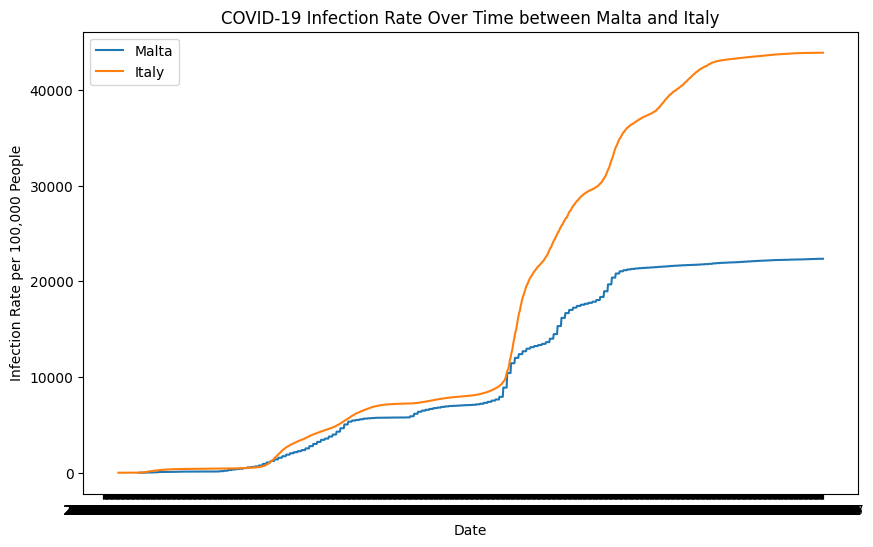

In [208]:
# plotting the results for the infection rate from the start of COVID in 2020 till now
plt.figure(figsize=(10, 6))
plt.plot(malta_data['date'], malta_data['infection_rate'], label='Malta')
plt.plot(italy_data['date'], italy_data['infection_rate'], label='Italy')
plt.xlabel('Date')
plt.ylabel('Infection Rate per 100,000 People')
plt.title('COVID-19 Infection Rate Over Time between Malta and Italy')
plt.legend()
plt.show()

c) Which countries have executed the least and most testing (per capita)?

In [209]:
# ISO-codes of the locations that have no total tests values
latest_tests = owid_covid_data.groupby('iso_code')['total_tests'].last()
nan_tests = latest_tests[latest_tests.isnull()].index
nan_tests

Index(['ASM', 'BES', 'BLM', 'COK', 'CPV', 'FLK', 'FSM', 'GGY', 'GLP', 'GRL',
       'GUF', 'HND', 'IMN', 'JEY', 'KGZ', 'KIR', 'LBY', 'MAC', 'MAF', 'MCO',
       'MDA', 'MNE', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'OWID_AFR',
       'OWID_ASI', 'OWID_CYN', 'OWID_ENG', 'OWID_EUN', 'OWID_EUR', 'OWID_HIC',
       'OWID_LIC', 'OWID_LMC', 'OWID_NAM', 'OWID_NIR', 'OWID_OCE', 'OWID_SAM',
       'OWID_SCT', 'OWID_UMC', 'OWID_WLS', 'OWID_WRL', 'PCN', 'PSE', 'PYF',
       'REU', 'SGP', 'SHN', 'SLB', 'SMR', 'SPM', 'SXM', 'SYC', 'TCA', 'TJK',
       'TKL', 'TKM', 'TON', 'TUV', 'UZB', 'VAT', 'VEN', 'WLF', 'WSM'],
      dtype='object', name='iso_code')

In [210]:
# in this case, there wasn't enough testing data for all of the countries, so some of the countries were removed from testing for this question
# filtering the ISO-code values that are in nan_tests (i.e. which do not have any testing cases values)
# true indicates that the iso_code is not in nan_tests
owid_filtered_testing_data = owid_covid_data[~owid_covid_data['iso_code'].isin(nan_tests)]
owid_filtered_testing_data
# making sure that the iso_codes were removed
# remaining_nan_tests = owid_filtered_testing_data['iso_code'].isin(nan_tests)
# print(remaining_nan_tests.sum())

,iso_code,total_tests,new_tests,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AFG,NaN,NaN,2020-01-03,NaN,0.0,NaN,0.0,41128772.0
1,AFG,NaN,NaN,2020-01-04,NaN,0.0,NaN,0.0,41128772.0
2,AFG,NaN,NaN,2020-01-05,NaN,0.0,NaN,0.0,41128772.0
3,AFG,NaN,NaN,2020-01-06,NaN,0.0,NaN,0.0,41128772.0
4,AFG,NaN,NaN,2020-01-07,NaN,0.0,NaN,0.0,41128772.0
...,...,...,...,...,...,...,...,...,...
329008,ZWE,NaN,NaN,2023-07-22,265666.0,0.0,5711.0,0.0,16320539.0
329009,ZWE,NaN,NaN,2023-07-23,265666.0,0.0,5711.0,0.0,16320539.0
329010,ZWE,NaN,NaN,2023-07-24,265666.0,0.0,5711.0,0.0,16320539.0
329011,ZWE,NaN,NaN,2023-07-25,265666.0,0.0,5711.0,0.0,16320539.0


In [211]:
# group by 'iso_code' and get the maximum 'total_tests' value for each group
max_tests = owid_filtered_testing_data.groupby('iso_code')['total_tests'].max()
# reset the index to turn 'iso_code' back into a column
max_tests = max_tests.reset_index()
max_tests

,iso_code,total_tests
0,ABW,793.0
1,AFG,994894.0
2,AGO,1618566.0
3,AIA,51382.0
4,ALB,1613870.0
...,...,...
183,VUT,11989.0
184,YEM,336937.0
185,ZAF,25637671.0
186,ZMB,3514038.0


In [212]:
# merge max_tests with owid_countries in order to get the population for each country
max_tests = pd.merge(max_tests, owid_countries[['iso_code', 'population', 'location']], on='iso_code')
max_tests

,iso_code,total_tests,population,location
0,ABW,793.0,106459.0,Aruba
1,AFG,994894.0,41128772.0,Afghanistan
2,AGO,1618566.0,35588996.0,Angola
3,AIA,51382.0,15877.0,Anguilla
4,ALB,1613870.0,2842318.0,Albania
...,...,...,...,...
183,VUT,11989.0,326744.0,Vanuatu
184,YEM,336937.0,33696612.0,Yemen
185,ZAF,25637671.0,59893884.0,South Africa
186,ZMB,3514038.0,20017670.0,Zambia


In [213]:
# calculating the testing rate per capita
max_tests['tests_per_million'] = max_tests['total_tests'] / max_tests['population'] * 1e6
# country with the least testing per capita
least_testing_country = max_tests.loc[max_tests['tests_per_million'].idxmin()]['location']
# country with the most testing per capita
most_testing_country = max_tests.loc[max_tests['tests_per_million'].idxmax()]['location']

# the countries which were used for this question
# countries_included = max_tests['location'].unique()
# for country in countries_included: 
#     print(country)

In [214]:

print(f"The country with the least testing per capita is {least_testing_country}.")
print(f"The country with the most testing per capita is {most_testing_country}.")

The country with the least testing per capita is Algeria.
The country with the most testing per capita is Cyprus.


d) Which countries have the lowest and highest mortality rate (per capita)?

In [215]:
# group by 'iso_code' and check if any non-NaN value exists in 'total_deaths' for each group
has_deaths = owid_covid_data.groupby('iso_code')['total_deaths'].apply(lambda x: x.notna().any())
# iso_codes that have no non-NaN values in 'total_deaths'
no_deaths_iso_codes = has_deaths[~has_deaths].index
no_deaths_iso_codes

Index(['ESH', 'FLK', 'HKG', 'MAC', 'NIU', 'OWID_CYN', 'OWID_ENG', 'OWID_NIR',
       'OWID_SCT', 'OWID_WLS', 'PCN', 'PRK', 'SHN', 'TKL', 'TKM', 'TWN',
       'VAT'],
      dtype='object', name='iso_code')

In [216]:
# filtering the ISO-code values that are in no_deaths_iso_codes (i.e. which do not have any total death cases values)
owid_filtered_deaths_data = owid_covid_data[~owid_covid_data['iso_code'].isin(no_deaths_iso_codes)]
# total number of deaths for each country - groupby function groups the df by the iso_code column, and then the max fn is applied to the total_deaths column
max_deaths = owid_filtered_deaths_data.groupby('iso_code')['total_deaths'].max()
populations = owid_countries.set_index('iso_code')['population']
# calculate the death rate per capita for each country
death_rate_per_capita = (max_deaths / populations) * 1000000  # per million people

# find the ISO codes of the countries with the lowest and highest death rates
lowest_death_rate_country = death_rate_per_capita.idxmin()
highest_death_rate_country = death_rate_per_capita.idxmax()

# print the countries with the lowest and highest death rates
print(f"Country with the lowest death rate is {owid_countries.loc[owid_countries['iso_code'] == lowest_death_rate_country, 'location'].values[0]} with death rate of {death_rate_per_capita[lowest_death_rate_country]}")
print(f"Country with the highest death rate is {owid_countries.loc[owid_countries['iso_code'] == highest_death_rate_country, 'location'].values[0]} with death rate of {death_rate_per_capita[highest_death_rate_country]}")

Country with the lowest death rate is Burundi with death rate of 1.1637304325516193
Country with the highest death rate is Peru with death rate of 6498.199038414209


In [217]:
# ISO codes of the countries used
countries_iso_codes = death_rate_per_capita.index
# corresponding country names
countries_used = owid_countries[owid_countries['iso_code'].isin(countries_iso_codes)]['location']
for country in countries_used:
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthelemy
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faeroe Islands
Micronesia (country)
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Guinea
Guadeloupe
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
French Guiana
Guam
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
Isle of 

e) Is there a correlation between testing, infection, and mortality rates?

In [218]:
# get the max total_tests, total_deaths, total_cases for each country
max_tests = owid_covid_data.groupby('iso_code')['total_tests'].max().rename('total_tests')
max_deaths = owid_covid_data.groupby('iso_code')['total_deaths'].max().rename('total_deaths')
max_cases = owid_covid_data.groupby('iso_code')['total_cases'].max().rename('total_cases')

# merge the three dataframes on 'iso_code'
merged_data = max_tests.to_frame().join([max_deaths, max_cases])

# calculate the testing rate per capita, death rate per capita, and infection rate per capita
merged_data['tests_per_capita'] = (merged_data['total_tests'] / populations) * 1000000  # per million people
merged_data['deaths_per_capita'] = (merged_data['total_deaths'] / populations) * 1000000  
merged_data['infection_rate_per_capita'] = (merged_data['total_cases'] / populations) * 1000000  

# remove rows where any of the three columns have NaN values
merged_data = merged_data.dropna(subset=['tests_per_capita', 'deaths_per_capita', 'infection_rate_per_capita'])

# correlation matrix
correlation_matrix = merged_data[['tests_per_capita', 'deaths_per_capita', 'infection_rate_per_capita']].corr()

print("Correlation matrix: \n", correlation_matrix)

Correlation matrix: 
                            tests_per_capita  deaths_per_capita  \
tests_per_capita                   1.000000           0.213187   
deaths_per_capita                  0.213187           1.000000   
infection_rate_per_capita          0.591725           0.491607   

                           infection_rate_per_capita  
tests_per_capita                            0.591725  
deaths_per_capita                           0.491607  
infection_rate_per_capita                   1.000000  


- The correlation between 'tests_per_capita' and 'deaths_per_capita' is 0.213187, which indicates a weak positive correlation. This means that countries that have more tests per capita also tend to have slightly more deaths per capita, but the relationship is not very strong.
- The correlation between 'tests_per_capita' and 'infection_rate_per_capita' is 0.591725, which indicates a moderate positive correlation. This means that countries that have more tests per capita also tend to have a higher infection rate per capita.
- The correlation between 'deaths_per_capita' and 'infection_rate_per_capita' is 0.491607, which indicates a moderate positive correlation. This means that countries that have more deaths per capita also tend to have a higher infection rate per capita.